In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import IPython.display as display

# Function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Define image directories
train_files_healthy = "plant dataset/Train/Train/Healthy"
train_files_powdery = "plant dataset/Train/Train/Powdery"
train_files_rust = "plant dataset/Train/Train/Rust"

test_files_healthy = "plant dataset/Test/Test/Healthy"
test_files_powdery = "plant dataset/Test/Test/Powdery"
test_files_rust = "plant dataset/Test/Test/Rust"

valid_files_healthy = "plant dataset/Validation/Validation/Healthy"
valid_files_powdery = "plant dataset/Validation/Validation/Powdery"
valid_files_rust = "plant dataset/Validation/Validation/Rust"

# Print number of files in each category
print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))
print("========================================================")
print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powdery leaf images in test set:", total_files(test_files_powdery))
print("Number of rusty leaf images in test set:", total_files(test_files_rust))
print("========================================================")
print("Number of healthy leaf images in validation set:", total_files(valid_files_healthy))
print("Number of powdery leaf images in validation set:", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(valid_files_rust))


Number of healthy leaf images in training set: 458
Number of powdery leaf images in training set: 430
Number of rusty leaf images in training set: 434
Number of healthy leaf images in test set: 50
Number of powdery leaf images in test set: 50
Number of rusty leaf images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powdery leaf images in validation set: 20
Number of rusty leaf images in validation set: 20


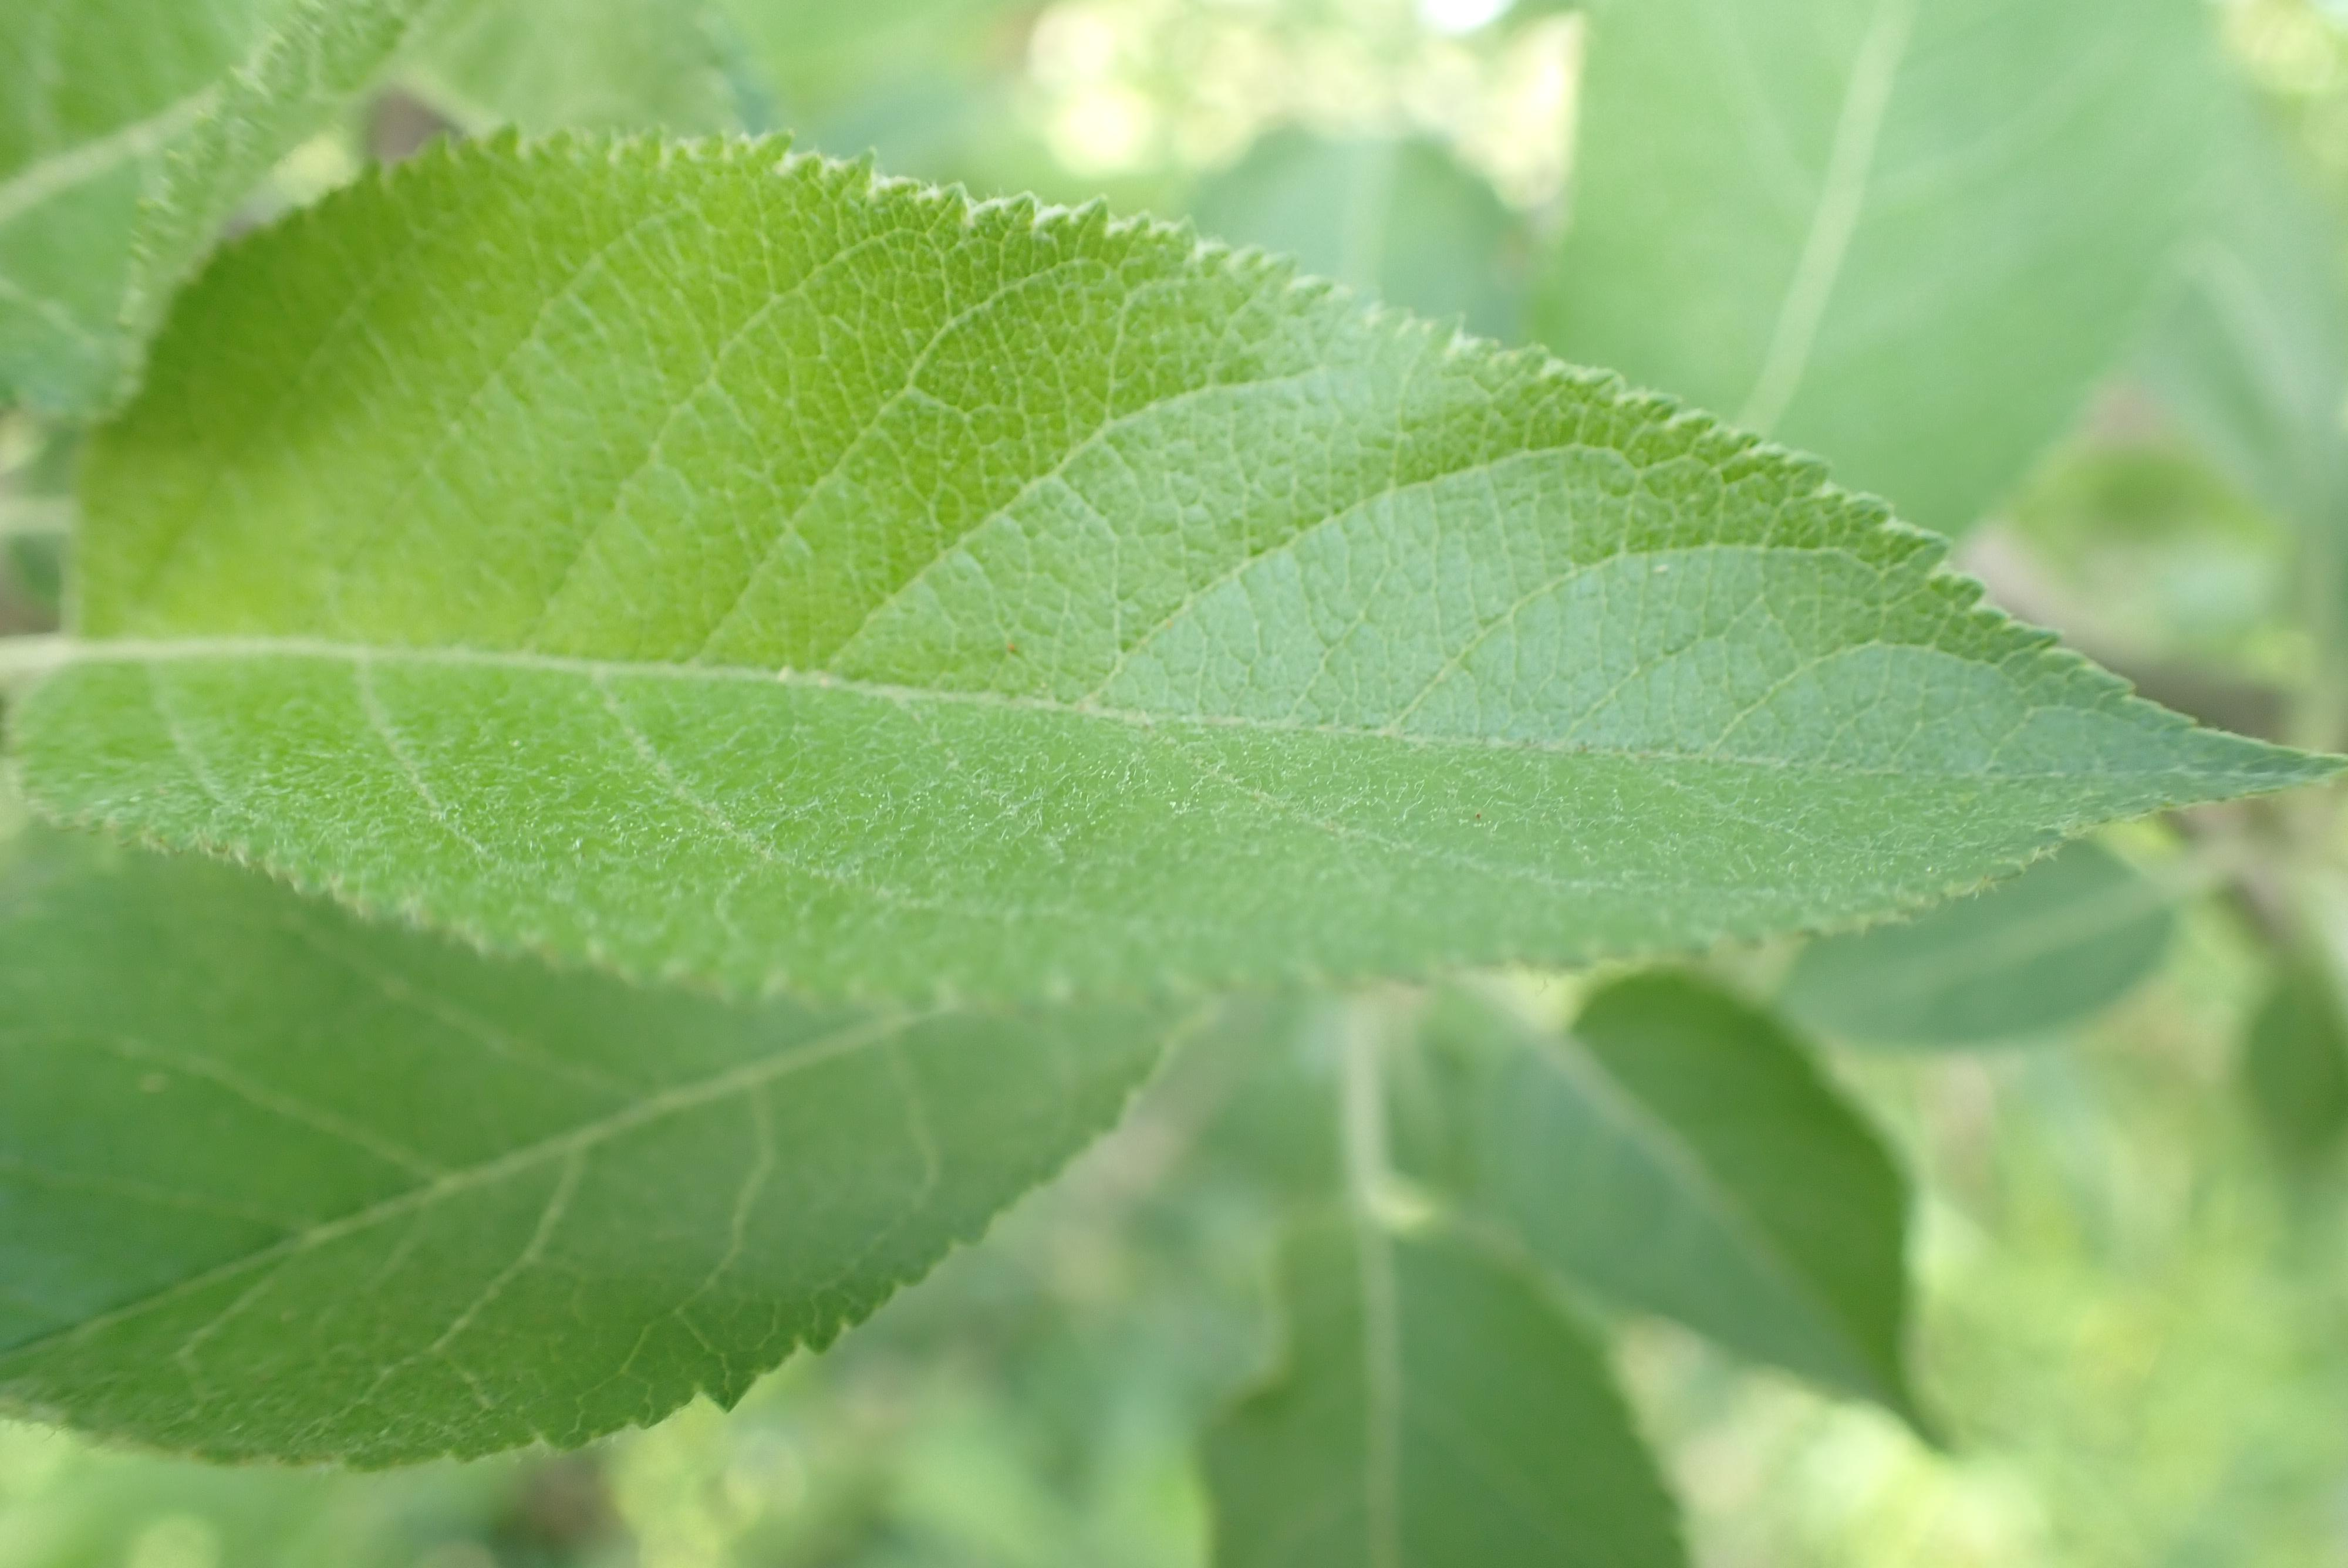

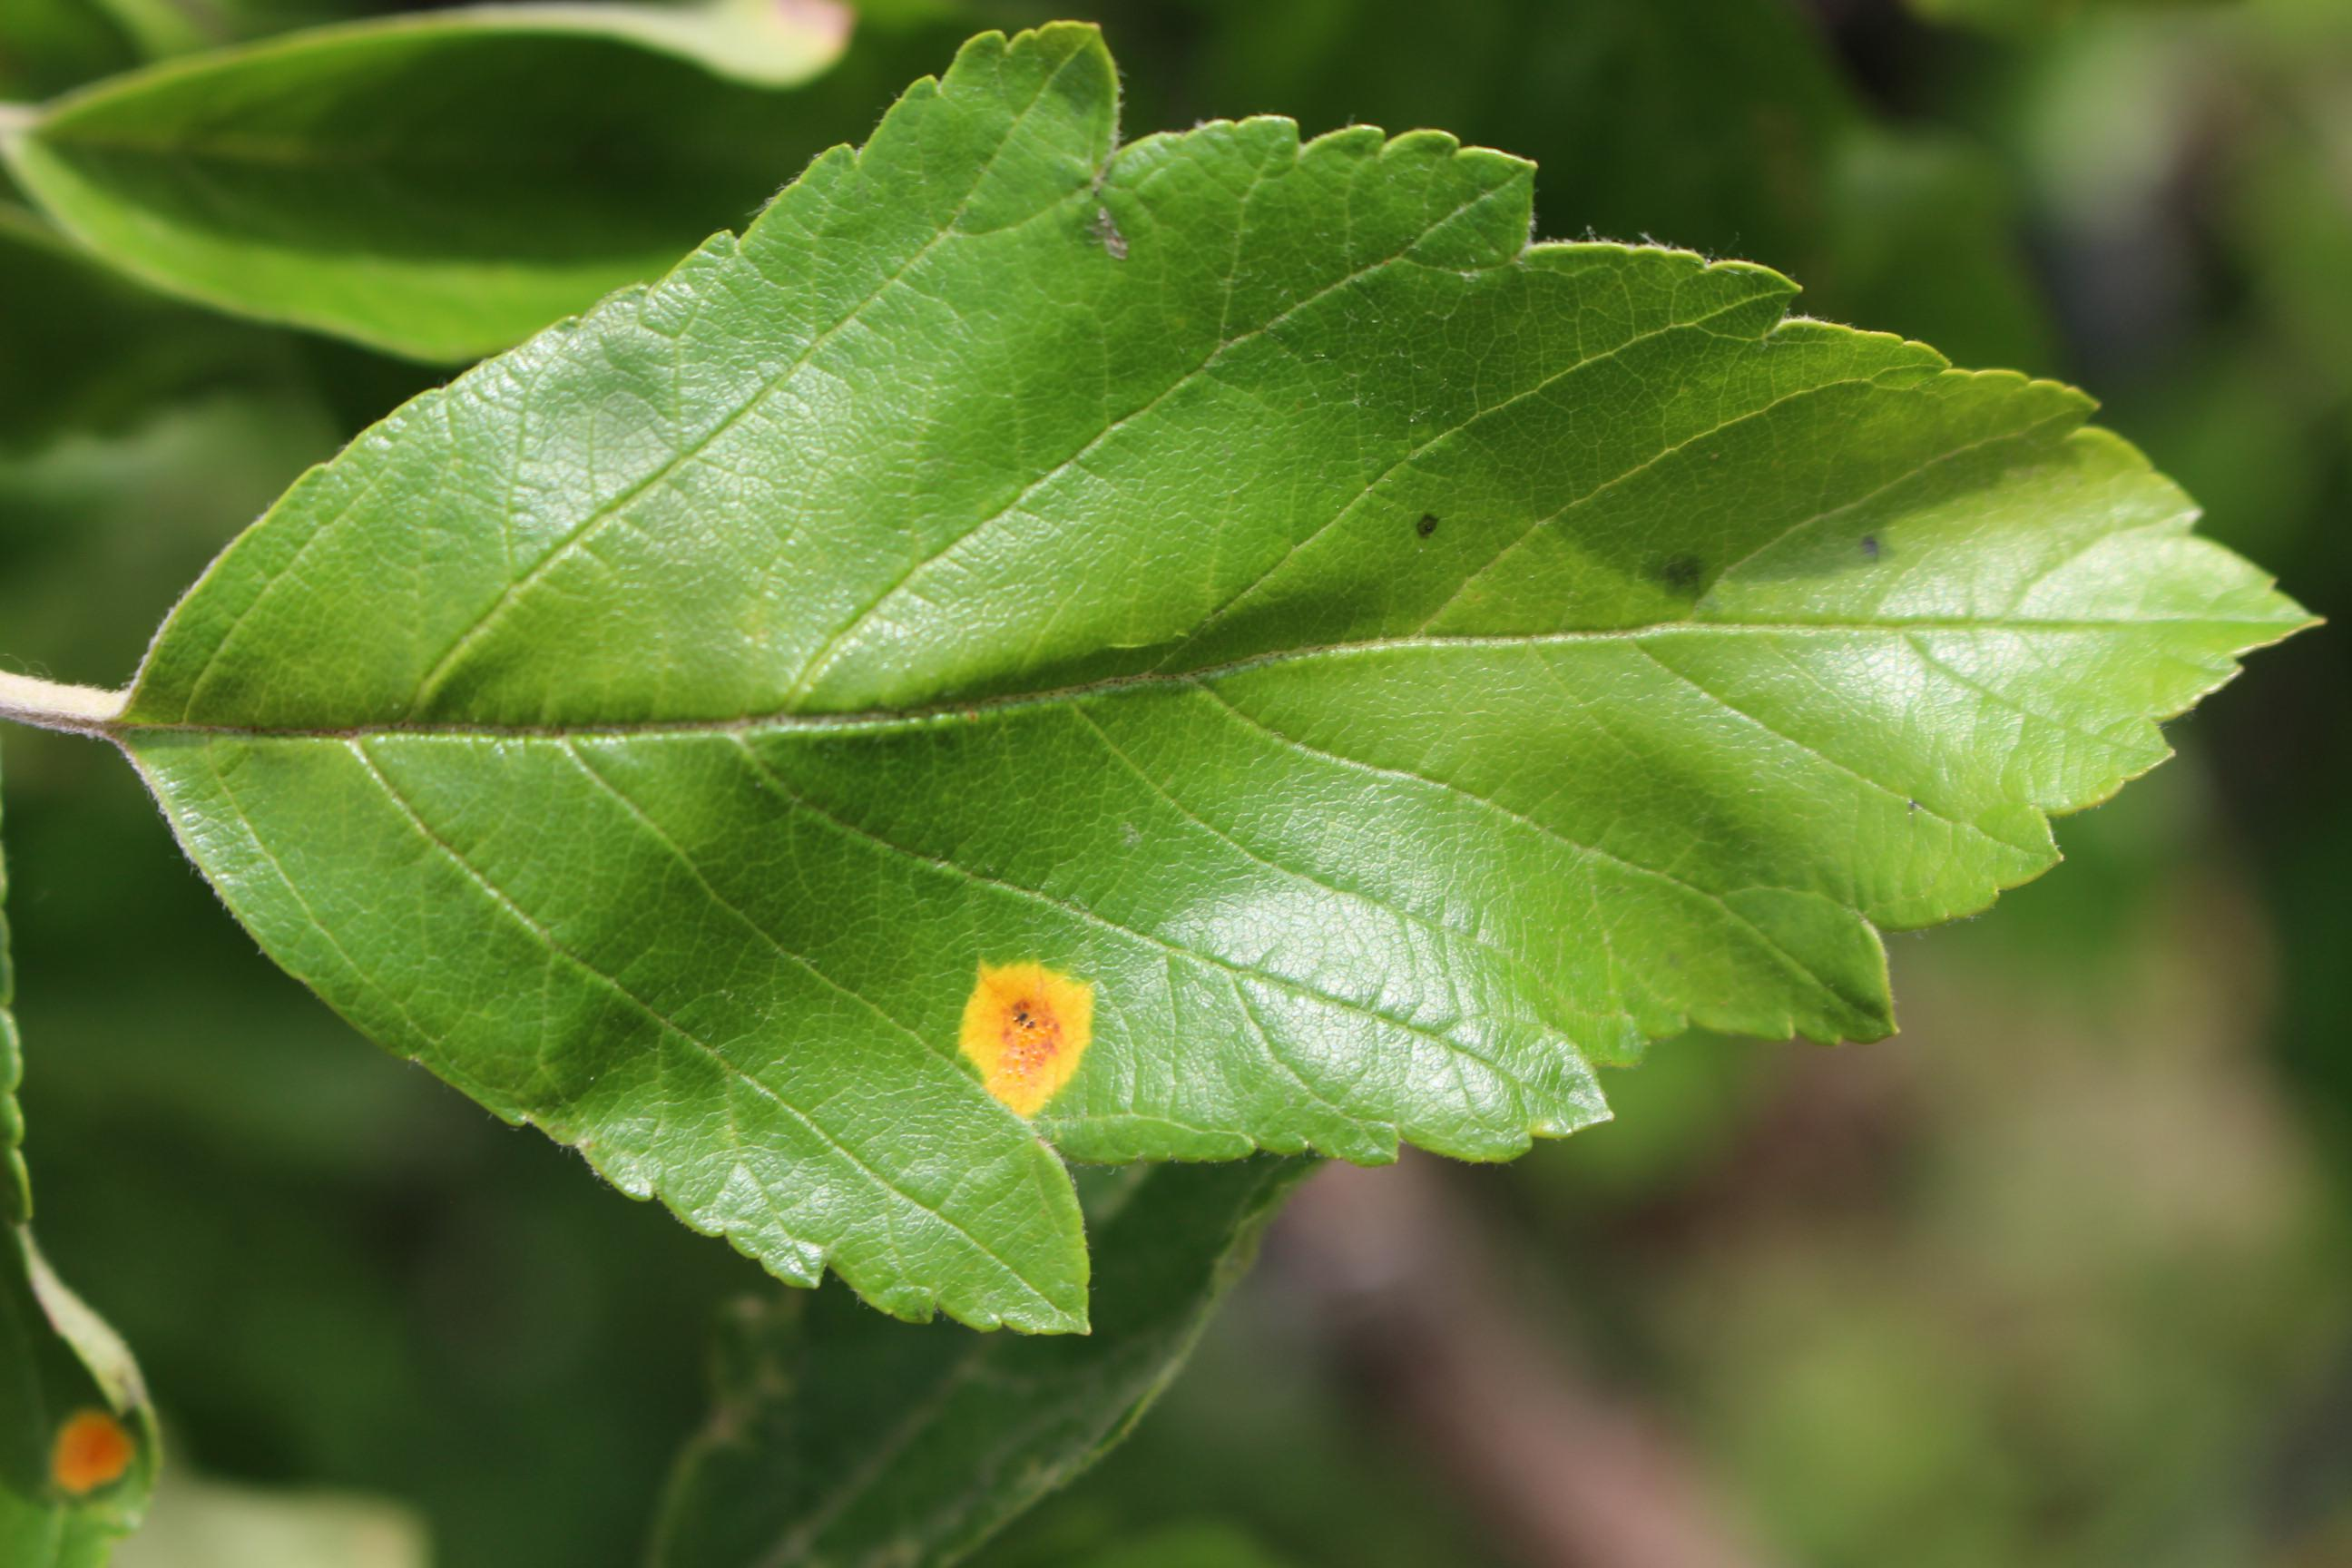

In [2]:
# Function to display image
def display_image(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))

# Display example images
display_image('plant dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg')
display_image('plant dataset/Test/Test/Rust/85e36e1b30afca61.jpg')


In [3]:
# Image data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory('plant dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('plant dataset/Test/Test',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [4]:
# PINN model architecture
model = models.Sequential([
    layers.Flatten(input_shape=(225, 225, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile PINN model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 151875)            0         
                                                                 
 dense (Dense)               (None, 512)               77760512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 77892611 (297.14 MB)
Trainable params: 77892611 (297.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train PINN model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)


Epoch 1/10


42/42 [==============================] - 193s 4s/step - loss: 30.9350 - accuracy: 0.3911 - val_loss: 14.9911 - val_accuracy: 0.4867
Epoch 2/10
42/42 [==============================] - 178s 4s/step - loss: 9.0969 - accuracy: 0.4992 - val_loss: 6.8019 - val_accuracy: 0.4733
Epoch 3/10
42/42 [==============================] - 178s 4s/step - loss: 3.6737 - accuracy: 0.5840 - val_loss: 2.6424 - val_accuracy: 0.5267
Epoch 4/10
42/42 [==============================] - 185s 4s/step - loss: 2.7451 - accuracy: 0.6188 - val_loss: 4.4889 - val_accuracy: 0.3733
Epoch 5/10
42/42 [==============================] - 180s 4s/step - loss: 3.5968 - accuracy: 0.5658 - val_loss: 1.7863 - val_accuracy: 0.6000
Epoch 6/10
42/42 [==============================] - 181s 4s/step - loss: 1.4580 - accuracy: 0.6233 - val_loss: 1.0680 - val_accuracy: 0.6200
Epoch 7/10
42/42 [==============================] - 177s 4s/step - loss: 1.4783 - accuracy: 0.6430 - val_loss: 1.5367 - val_accuracy: 0.4133
Epoch 8/1

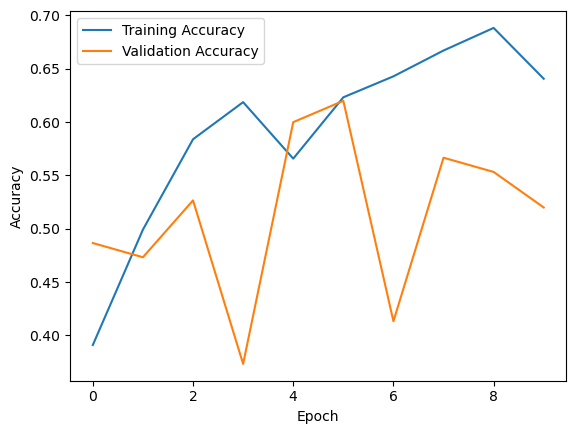

C:\Users\Rahul Singh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save PINN model
model.save("pinn_model.h5")



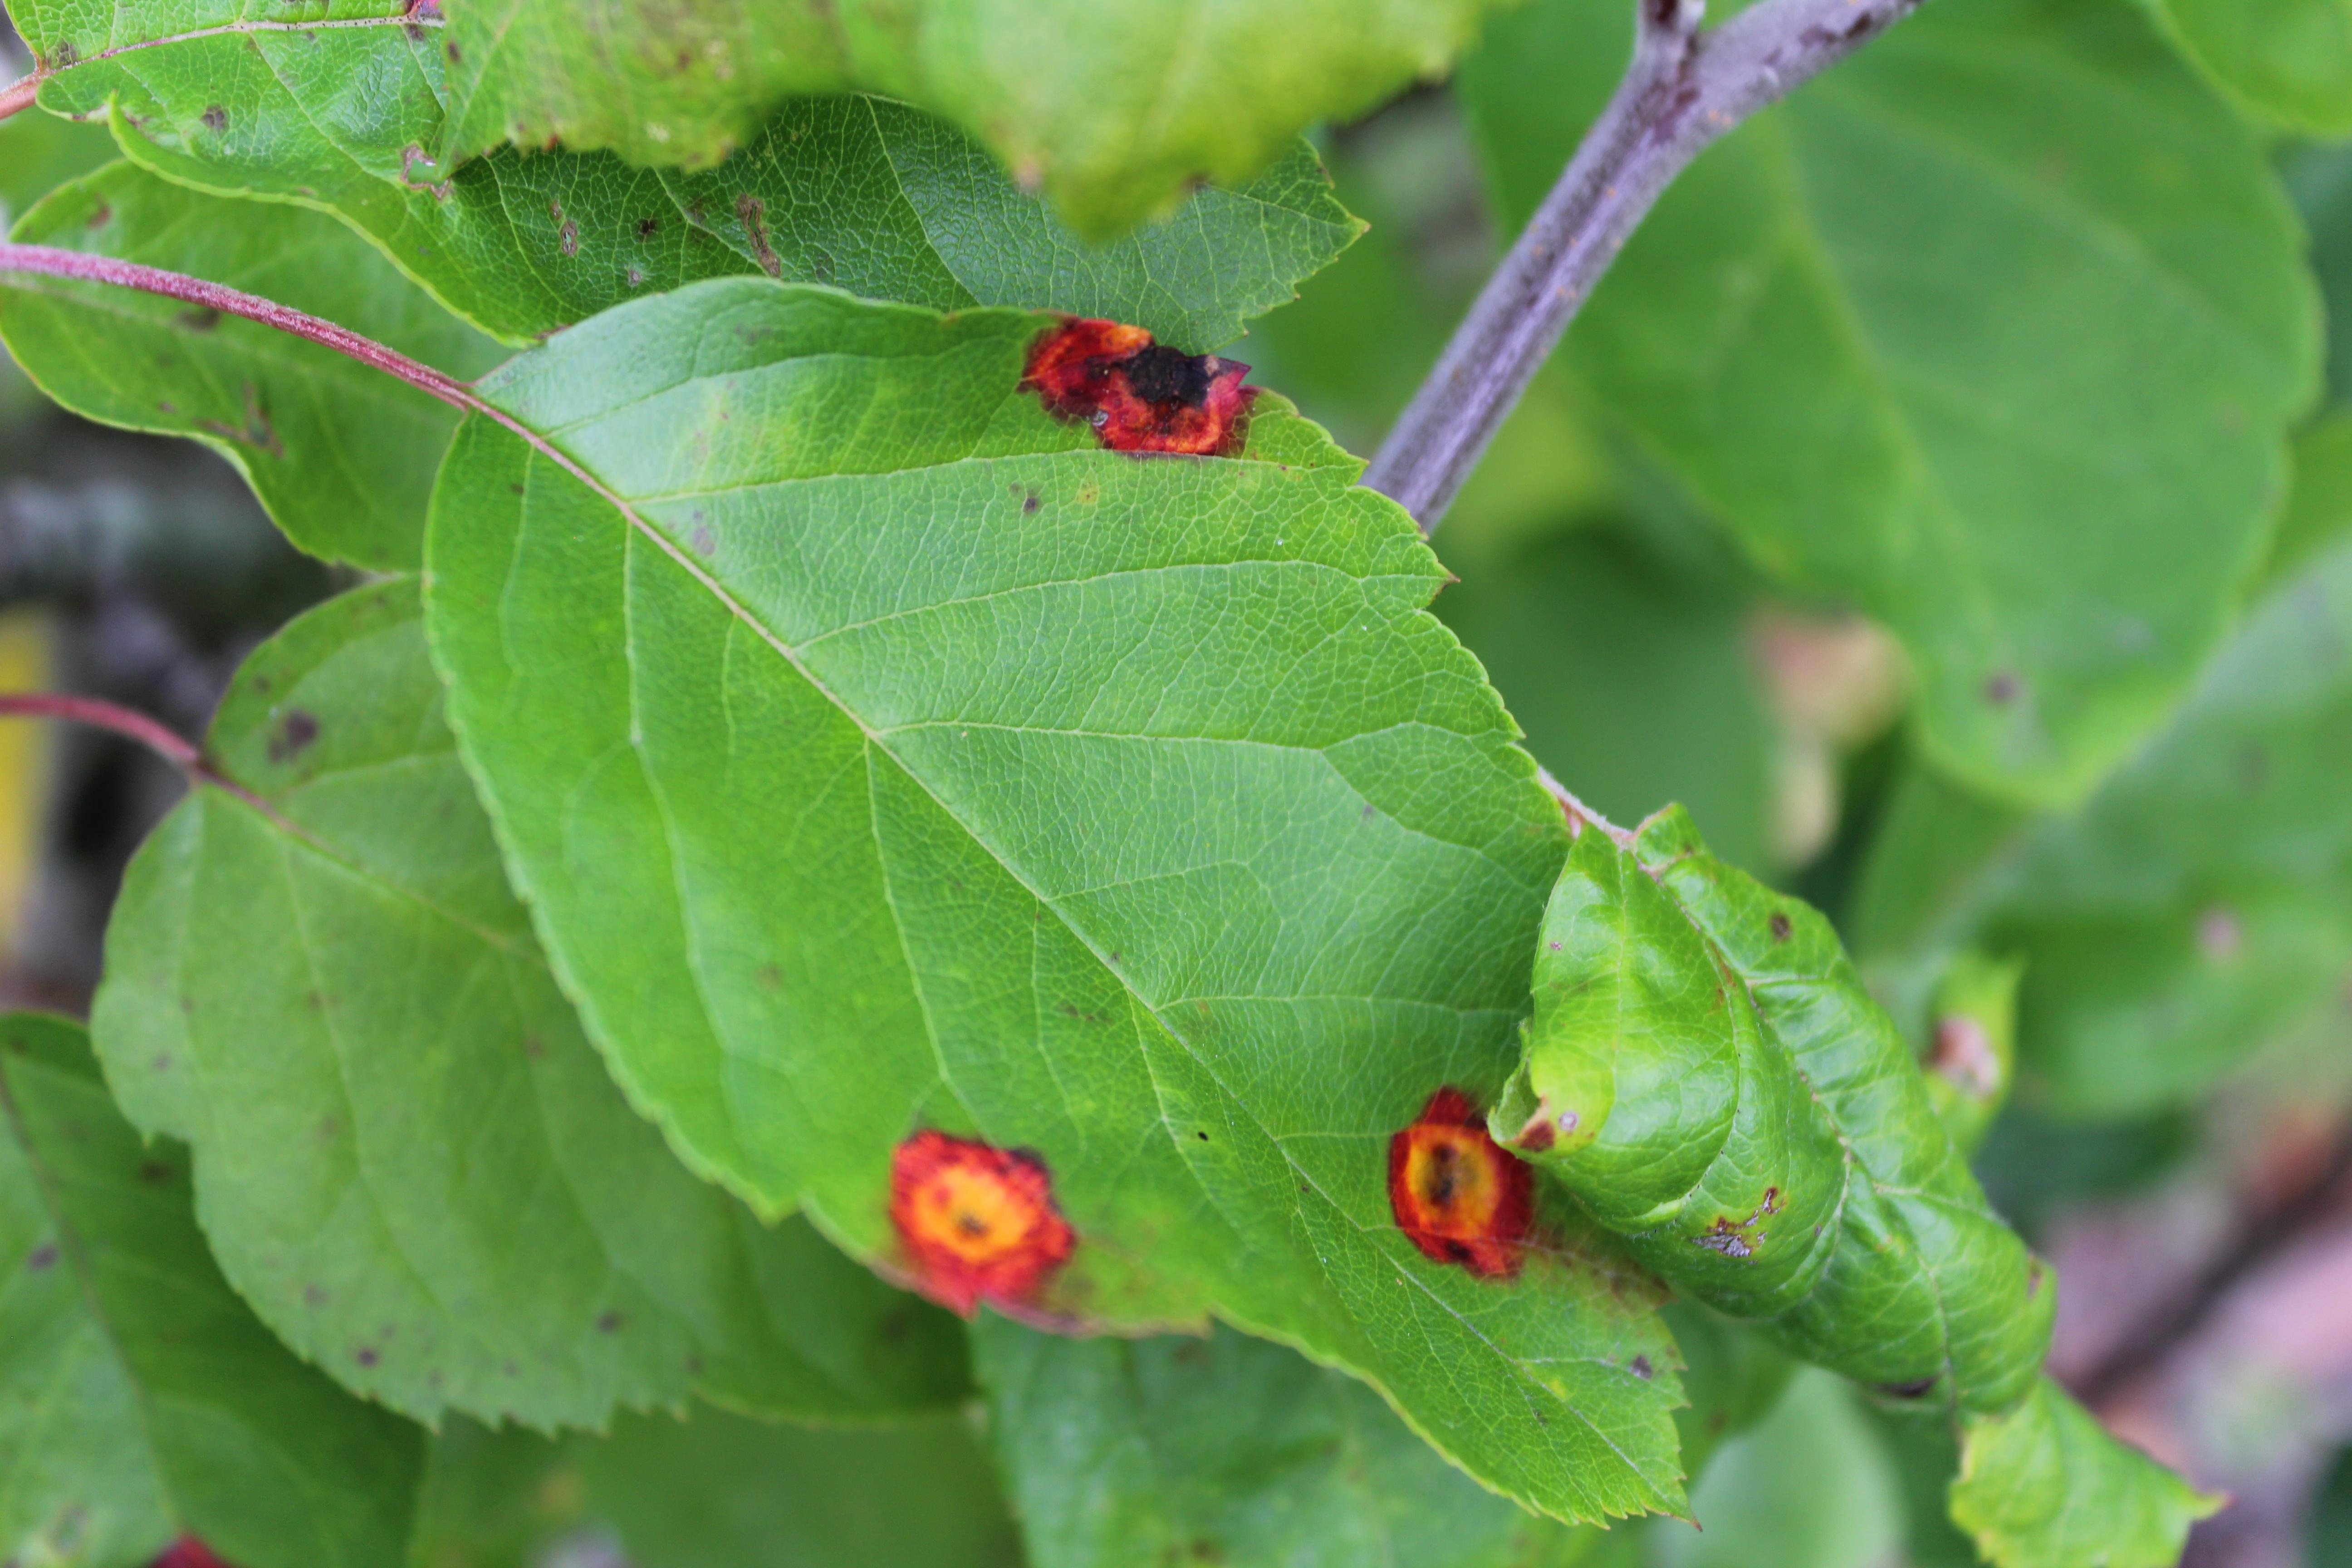

1/1 [==============================] - 0s 195ms/step
Predicted label: Healthy


In [7]:
# Function to preprocess image
def preprocess_image(image_path, target_size=(225, 225)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    x = np.array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Test PINN model with an example image
image_path = 'plant dataset/Train/Train/Rust/81c97ef498cc87c3.jpg'
x = preprocess_image(image_path)
display_image(image_path)
predictions = model.predict(x)
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
predicted_label = labels[np.argmax(predictions)]
print("Predicted label:", predicted_label)

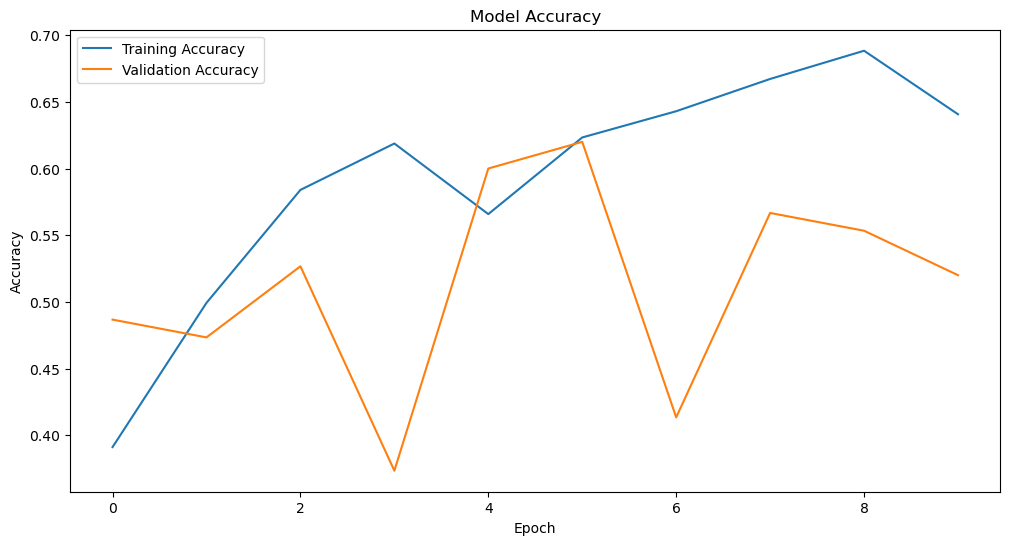

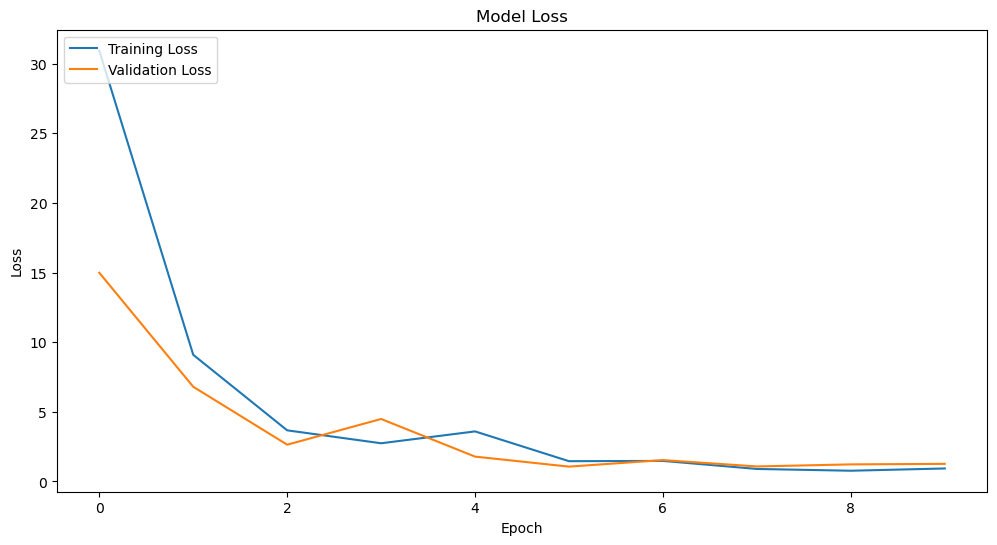

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print('Test Accuracy:', test_accuracy)

5/5 [==============================] - 14s 3s/step - loss: 1.2665 - accuracy: 0.5200
Test Accuracy: 0.5199999809265137


5/5 [==============================] - 14s 3s/step


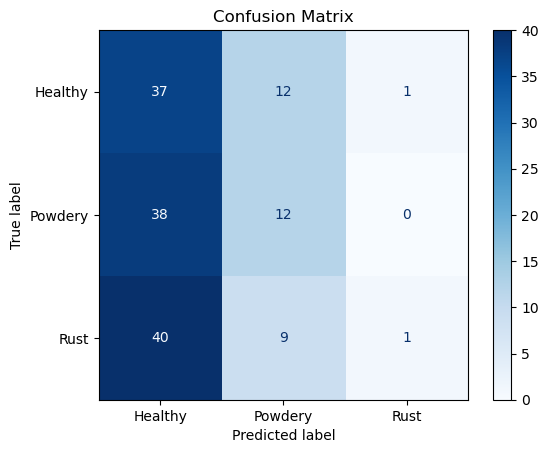

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import classification_report

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

5/5 [==============================] - 14s 3s/step
              precision    recall  f1-score   support

     Healthy       0.34      0.78      0.47        50
     Powdery       0.36      0.24      0.29        50
        Rust       0.50      0.02      0.04        50

    accuracy                           0.35       150
   macro avg       0.40      0.35      0.27       150
weighted avg       0.40      0.35      0.27       150



In [12]:
from sklearn.metrics import classification_report

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

5/5 [==============================] - 14s 3s/step
              precision    recall  f1-score   support

     Healthy       0.33      0.76      0.46        50
     Powdery       0.30      0.20      0.24        50
        Rust       0.50      0.02      0.04        50

    accuracy                           0.33       150
   macro avg       0.38      0.33      0.25       150
weighted avg       0.38      0.33      0.25       150



5/5 [==============================] - 14s 3s/step


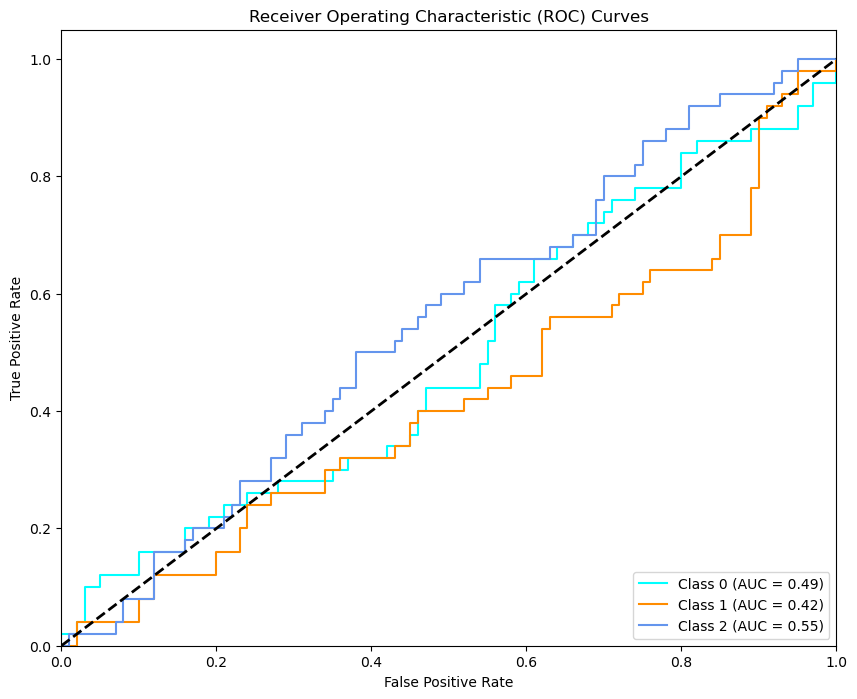

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Binarize the output labels for multi-class ROC
n_classes = len(validation_generator.class_indices)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i}').plot(ax=plt.gca(), color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()